In [3]:
#!/usr/bin/env python
# coding: utf-8

# # IT540 Assignment 3: Predicting Chess Game Outcomes
#
# **Author:** [Your Name]
# **Date:** 2025-06-23
#



In [4]:

"""
Assignment 3 - Predicting Chess Game Outcomes
Author: [Your Name]
Course: IT540
Date: 2025-06-23



This script loads the sample chess games dataset, builds baseline and tuned neural network
models for classification, and saves results and model files.
"""



'\nAssignment 3 - Predicting Chess Game Outcomes\nAuthor: [Your Name]\nCourse: IT540\nDate: 2025-06-23\n\n\n\nThis script loads the sample chess games dataset, builds baseline and tuned neural network\nmodels for classification, and saves results and model files.\n'

In [11]:

pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("✅ GPU is available and will be used.")
    except Exception as e:
        print("⚠️ GPU setup failed:", e)
else:
    print("❌ No GPU found. Running on CPU.")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop




2025-06-23 22:21:31.571951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750697491.592192   78538 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750697491.598218   78538 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-23 22:21:31.623795: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


❌ No GPU found. Running on CPU.


2025-06-23 22:21:33.651365: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [2]:

# 1. Data Loading and Exploration
df = pd.read_csv('matmob_data_sample.csv')
print('Data shape:', df.shape)
print('Sample row:\n', df.iloc[0])
print('\nResult distribution:\n', df['result'].value_counts())




Data shape: (100000, 16)
Sample row:
 w.mat.mean                                                 28.166667
w.mat.sd                                                    8.850414
b.mat.mean                                                 28.135417
b.mat.sd                                                    9.671031
w.mob.mean                                                   39.3125
w.mob.sd                                                   12.951885
b.mob.mean                                                    27.125
b.mob.sd                                                   11.296064
result                                                           1-0
valid.games.row                                              1343406
w.mat.vector       39, 39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38...
b.mat.vector       39, 39, 39, 39, 39, 39, 39, 38, 38, 38, 38, 38...
w.mob.vector       20, 28, 30, 32, 30, 40, 40, 45, 49, 47, 49, 51...
b.mob.vector       20, 22, 28, 34, 34, 35, 31, 32, 33, 30, 30, 28

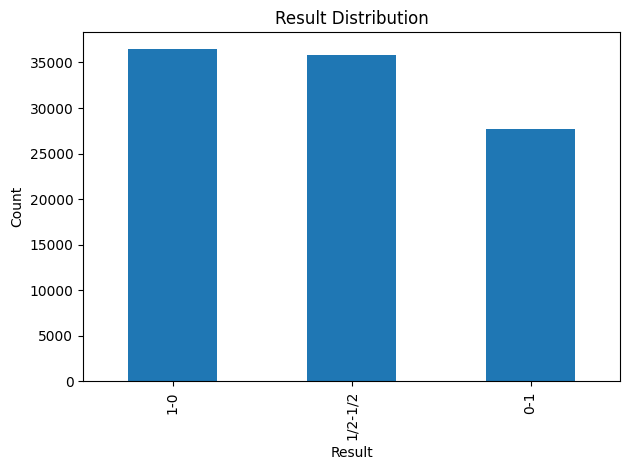

In [3]:

# Bar chart of result distribution
counts = df['result'].value_counts()
counts.plot(kind='bar')
plt.title('Result Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('result_distribution.png')
plt.show()




In [4]:

# 2. Data Preparation
cols = ['w.mat.mean','b.mat.mean','w.mob.mean','b.mob.mean','half.moves','result']
df2 = df[cols].copy()




In [5]:

# Encode result
mapping = {'0-1': 0, '1-0': 1, '1/2-1/2': 2}
df2['result'] = df2['result'].map(mapping)




In [6]:

# Split predictors and target
X = df2.drop('result', axis=1).values
y = df2['result'].values




In [7]:

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




In [8]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)




In [9]:

# Helper to plot history
def plot_history(history, filename):
    plt.figure()
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()




In [10]:

# 3. Baseline Neural Network Model
baseline_model = Sequential([
    Dense(50, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])
baseline_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=SGD(),
    metrics=['accuracy']
)




/home/section/sandman_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3689 - loss: 1.1089 - val_accuracy: 0.4440 - val_loss: 1.0578
Epoch 2/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4634 - loss: 1.0513 - val_accuracy: 0.5038 - val_loss: 1.0255
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5061 - loss: 1.0210 - val_accuracy: 0.5215 - val_loss: 1.0025
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5183 - loss: 0.9993 - val_accuracy: 0.5292 - val_loss: 0.9868
Epoch 5/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5283 - loss: 0.9825 - val_accuracy: 0.5273 - val_loss: 0.9760
Epoch 6/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5267 - loss: 0.9751 - val_accuracy: 0.5287 - val_loss: 0.9695
Epoch 7/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5289 - loss: 0.9695 - val_accuracy: 0.5296 - val_loss: 0.9656
Epoch 8/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5302 - loss: 0.9636 - val_accu

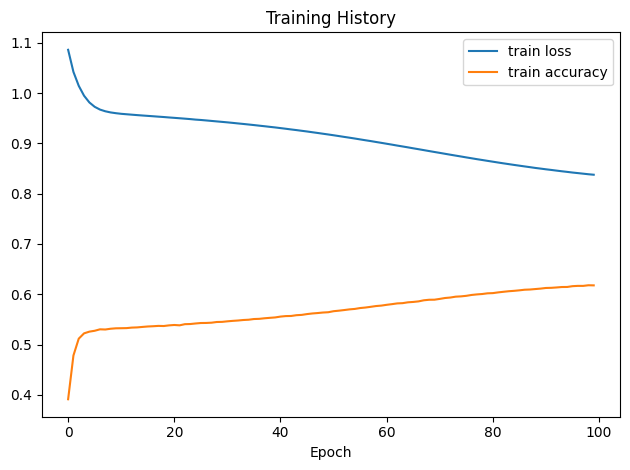

In [11]:

history_baseline = baseline_model.fit(
    X_train, y_train, epochs=100, batch_size=128, validation_split=0.1
)
baseline_loss, baseline_acc = baseline_model.evaluate(X_test, y_test)
print(f'Baseline Test Accuracy: {baseline_acc:.4f}')
plot_history(history_baseline, 'baseline_history.png')




In [12]:

# 4. Hyperparameter Tuning via Manual Grid Search
configs = [
    {'units': 30, 'activation': 'relu',    'optimizer': 'SGD',     'lr': 0.01,   'batch_size': 64,  'epochs': 50},
    {'units': 50, 'activation': 'sigmoid', 'optimizer': 'SGD',     'lr': 0.01,   'batch_size': 128, 'epochs': 100},
    {'units': 50, 'activation': 'relu',    'optimizer': 'Adam',    'lr': 0.001,  'batch_size': 64,  'epochs': 100},
    {'units': 100,'activation': 'tanh',    'optimizer': 'RMSprop', 'lr': 0.001,  'batch_size': 128, 'epochs': 50},
    {'units': 100,'activation': 'relu',    'optimizer': 'SGD',     'lr': 0.1,    'batch_size': 32,  'epochs': 100},
    {'units': 30, 'activation': 'tanh',    'optimizer': 'Adam',    'lr': 0.01,   'batch_size': 32,  'epochs': 50},
    {'units': 75, 'activation': 'relu',    'optimizer': 'RMSprop', 'lr': 0.0005, 'batch_size': 64,  'epochs': 75},
    {'units': 60, 'activation': 'sigmoid', 'optimizer': 'Adam',    'lr': 0.005,  'batch_size': 128, 'epochs': 100},
]




In [13]:

config_results = []
for cfg in configs:
    # Select optimizer
    if cfg['optimizer'] == 'SGD':
        opt = SGD(learning_rate=cfg['lr'])
    elif cfg['optimizer'] == 'Adam':
        opt = Adam(learning_rate=cfg['lr'])
    else:
        opt = RMSprop(learning_rate=cfg['lr'])
    # Build model
    model = Sequential([
        Dense(cfg['units'], activation=cfg['activation'], input_shape=(X_train.shape[1],)),
        Dense(3, activation='softmax')
    ])
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=opt,
        metrics=['accuracy']
    )
    # Train
    history = model.fit(
        X_train, y_train,
        epochs=cfg['epochs'],
        batch_size=cfg['batch_size'],
        validation_split=0.1,
        verbose=0
    )
    # Evaluate
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    config_results.append((cfg, acc))
    print(f"Config {cfg} -> Test Accuracy: {acc:.4f}")




Config {'units': 30, 'activation': 'relu', 'optimizer': 'SGD', 'lr': 0.01, 'batch_size': 64, 'epochs': 50} -> Test Accuracy: 0.6318
Config {'units': 50, 'activation': 'sigmoid', 'optimizer': 'SGD', 'lr': 0.01, 'batch_size': 128, 'epochs': 100} -> Test Accuracy: 0.6101
Config {'units': 50, 'activation': 'relu', 'optimizer': 'Adam', 'lr': 0.001, 'batch_size': 64, 'epochs': 100} -> Test Accuracy: 0.6400
Config {'units': 100, 'activation': 'tanh', 'optimizer': 'RMSprop', 'lr': 0.001, 'batch_size': 128, 'epochs': 50} -> Test Accuracy: 0.6321
Config {'units': 100, 'activation': 'relu', 'optimizer': 'SGD', 'lr': 0.1, 'batch_size': 32, 'epochs': 100} -> Test Accuracy: 0.6377
Config {'units': 30, 'activation': 'tanh', 'optimizer': 'Adam', 'lr': 0.01, 'batch_size': 32, 'epochs': 50} -> Test Accuracy: 0.6340
Config {'units': 75, 'activation': 'relu', 'optimizer': 'RMSprop', 'lr': 0.0005, 'batch_size': 64, 'epochs': 75} -> Test Accuracy: 0.6381
Config {'units': 60, 'activation': 'sigmoid', 'optimi

In [14]:

# Identify best configuration
best_cfg, best_acc = max(config_results, key=lambda x: x[1])
print(f"Best Config: {best_cfg} with Accuracy: {best_acc:.4f}")

Best Config: {'units': 50, 'activation': 'relu', 'optimizer': 'Adam', 'lr': 0.001, 'batch_size': 64, 'epochs': 100} with Accuracy: 0.6400


In [15]:

# 5. Improved Model with Best Configuration
if best_cfg['optimizer'] == 'SGD':
    opt = SGD(learning_rate=best_cfg['lr'])
elif best_cfg['optimizer'] == 'Adam':
    opt = Adam(learning_rate=best_cfg['lr'])
else:
    opt = RMSprop(learning_rate=best_cfg['lr'])




Epoch 1/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5186 - loss: 0.9700 - val_accuracy: 0.5724 - val_loss: 0.8931
Epoch 2/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5872 - loss: 0.8786 - val_accuracy: 0.6142 - val_loss: 0.8348
Epoch 3/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6188 - loss: 0.8311 - val_accuracy: 0.6294 - val_loss: 0.8099
Epoch 4/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6303 - loss: 0.8131 - val_accuracy: 0.6325 - val_loss: 0.8016
Epoch 5/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6311 - loss: 0.8095 - val_accuracy: 0.6294 - val_loss: 0.7999
Epoch 6/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6359 - loss: 0.8039 - val_accuracy: 0.6376 - val_loss: 0.7992
Epoch 7/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6371 - loss: 0.7995 - val_accuracy: 0.6335 - val_loss: 0.7962
Epoch 8/100
1196/1196 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6365 - loss: 0

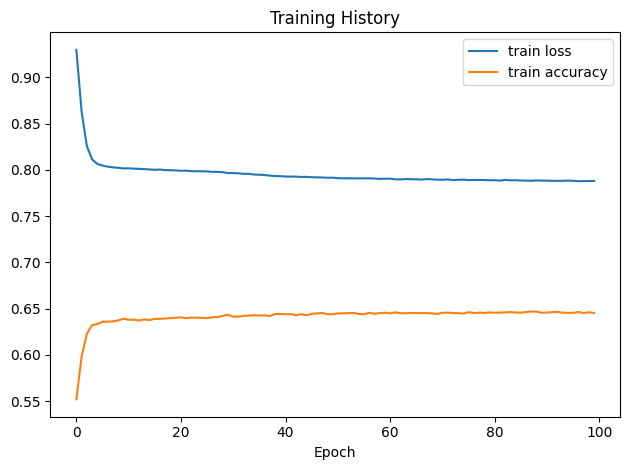

In [16]:

imp_model = Sequential([
    Dense(best_cfg['units'], activation=best_cfg['activation'], input_shape=(X_train.shape[1],)),
    Dense(3, activation='softmax')
])
imp_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)
history_imp = imp_model.fit(
    X_train, y_train,
    epochs=best_cfg['epochs'],
    batch_size=best_cfg['batch_size'],
    validation_split=0.1
)
imp_loss, imp_acc = imp_model.evaluate(X_test, y_test)
print(f'Improved Model Test Accuracy: {imp_acc:.4f}')
plot_history(history_imp, 'improved_history.png')




In [17]:

print(f"Accuracy Comparison -> Baseline: {baseline_acc:.4f}, Improved: {imp_acc:.4f}")




Accuracy Comparison -> Baseline: 0.6134, Improved: 0.6390


In [2]:
pip install pandas seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 3.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 KB 7.5 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 2.2 MB/s eta 0:00:007.9 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.1 MB/s eta 0:00:00m eta 0:00:010:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 3.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 KB 3.4 MB/s eta 0:00:000:00:01m eta 0:00:01
  Using cached kiwisolver-1.4.8-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 KB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install optuna scikit-learn


  Using cached optuna-4.4.0-py3-none-any.whl (395 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 3.5 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached PyYAML-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (751 kB)
  Using cached sqlalchemy-2.0.41-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 KB 3.2 MB/s eta 0:00:003.6 MB/s eta 0:00:01
  Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 KB 2.4 MB/s eta 0:00:002.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 3.6 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached tomli-2.2.1-py3-none-any.whl (14 kB)
  Using cached mako-1.3.10-py3-none-any.whl (78 kB)
  Using cached greenlet-3.2.3-cp310-cp310-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl (582 kB)
Note: you may need to restart the ke

In [18]:

# Save models
baseline_model.save('baseline_model.h5')
imp_model.save('improved_model.h5')




In [19]:

# Save final results to a CSV
results_df = pd.DataFrame([
    {"model": "baseline", "accuracy": baseline_acc},
    {"model": "improved", "accuracy": imp_acc}
])
results_df.to_csv('model_comparison.csv', index=False)


